## Introducing Data Science Workflows

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("train.csv")
holdout = pd.read_csv("test.csv")

In [2]:
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.shape


(1460, 81)

In [4]:
holdout.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
holdout.shape

(1459, 80)

In [6]:
len(df)

1460

In [7]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<AxesSubplot:>

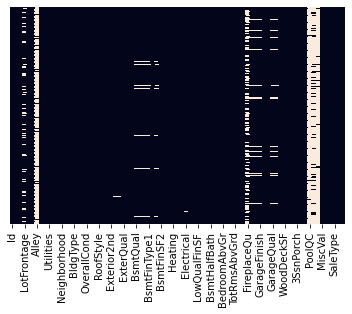

In [10]:
sns.heatmap(df.isnull(),yticklabels= False, cbar=False)

<AxesSubplot:>

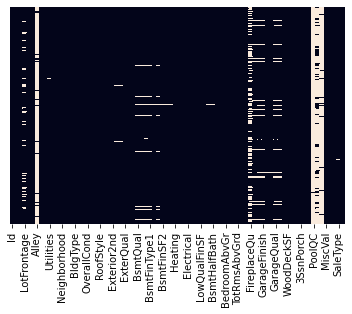

In [11]:
sns.heatmap(holdout.isnull(),yticklabels= False, cbar=False)

In [12]:
half_count_df = len(df)/2
df = df.dropna(thresh=half_count_df,axis=1)

In [13]:
half_count_test = len(holdout)/2
holdout = holdout.dropna(thresh=half_count_test,axis=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

<AxesSubplot:>

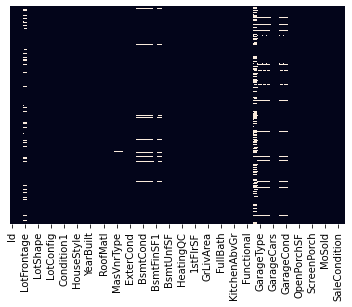

In [15]:
sns.heatmap(df.isnull(),yticklabels= False, cbar=False)

<AxesSubplot:>

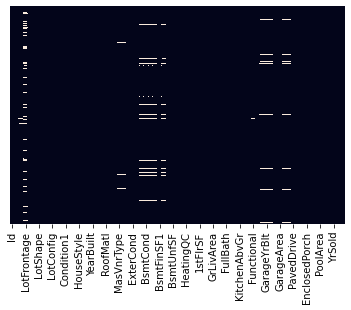

In [16]:
sns.heatmap(holdout.isnull(),yticklabels= False, cbar=False)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [18]:

df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [19]:
holdout['LotFrontage']=holdout.fillna(holdout['LotFrontage'].mean())

In [20]:
df['FireplaceQu'] = df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])

In [21]:
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])

In [22]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())

In [23]:
df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])

In [24]:
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

In [25]:
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])

In [26]:
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [27]:
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [28]:
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])

In [29]:
#test data cleaning

In [30]:
holdout['BsmtQual'] = holdout['BsmtQual'].fillna(holdout['BsmtQual'].mode()[0])

In [31]:
holdout['GarageType'] = holdout['GarageType'].fillna(holdout['GarageType'].mode()[0])

In [32]:
holdout['GarageYrBlt'] = holdout['GarageYrBlt'].fillna(holdout['GarageYrBlt'].mean())

In [33]:
holdout['GarageFinish'] = holdout['GarageFinish'].fillna(holdout['GarageFinish'].mode()[0])

In [34]:
holdout['GarageFinish'] = holdout['GarageFinish'].fillna(holdout['GarageFinish'].mode()[0])

In [35]:
holdout['GarageQual'] = holdout['GarageQual'].fillna(holdout['GarageQual'].mode()[0])

In [36]:
holdout['GarageCond'] = holdout['GarageCond'].fillna(holdout['GarageCond'].mode()[0])

In [37]:
holdout['GarageCond'] = holdout['GarageCond'].fillna(holdout['GarageCond'].mode()[0])

In [38]:
holdout['MasVnrArea'] = holdout['MasVnrArea'].fillna(holdout['MasVnrArea'].mean())

In [39]:
df.drop(['Id'], axis =1 , inplace=True)

In [40]:
df.shape

(1460, 76)

In [41]:
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])

In [42]:
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])

In [43]:
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

In [44]:
holdout['BsmtCond'] = holdout['BsmtCond'].fillna(holdout['BsmtCond'].mode()[0])

In [45]:
holdout['BsmtExposure'] = holdout['BsmtExposure'].fillna(holdout['BsmtExposure'].mode()[0])

In [46]:
holdout['BsmtFinType1'] = holdout['BsmtFinType1'].fillna(holdout['BsmtFinType1'].mode()[0])

In [47]:
holdout['BsmtFinType2'] = holdout['BsmtFinType2'].fillna(holdout['BsmtFinType2'].mode()[0])

In [48]:
holdout['Utilities']=holdout['Utilities'].fillna(holdout['Utilities'].mode()[0])
holdout['Exterior1st']=holdout['Exterior1st'].fillna(holdout['Exterior1st'].mode()[0])
holdout['Exterior2nd']=holdout['Exterior2nd'].fillna(holdout['Exterior2nd'].mode()[0])

holdout['BsmtFinSF1']=holdout['BsmtFinSF1'].fillna(holdout['BsmtFinSF1'].mean())
holdout['BsmtFinSF2']=holdout['BsmtFinSF2'].fillna(holdout['BsmtFinSF2'].mean())
holdout['BsmtUnfSF']=holdout['BsmtUnfSF'].fillna(holdout['BsmtUnfSF'].mean())
holdout['TotalBsmtSF']=holdout['TotalBsmtSF'].fillna(holdout['TotalBsmtSF'].mean())
holdout['BsmtFullBath']=holdout['BsmtFullBath'].fillna(holdout['BsmtFullBath'].mode()[0])
holdout['BsmtHalfBath']=holdout['BsmtHalfBath'].fillna(holdout['BsmtHalfBath'].mode()[0])
holdout['KitchenQual']=holdout['KitchenQual'].fillna(holdout['KitchenQual'].mode()[0])
holdout['Functional']=holdout['Functional'].fillna(holdout['Functional'].mode()[0])
holdout['GarageCars']=holdout['GarageCars'].fillna(holdout['GarageCars'].mean())
holdout['GarageArea']=holdout['GarageArea'].fillna(holdout['GarageArea'].mean())
holdout['SaleType']=holdout['SaleType'].fillna(holdout['SaleType'].mode()[0])

<AxesSubplot:>

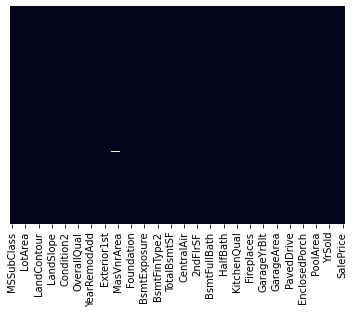

In [49]:
sns.heatmap(df.isnull(),yticklabels= False, cbar=False)

In [50]:
holdout.drop(['Id'],axis=1,inplace=True)

In [51]:

holdout.to_csv('formulate_holdout.csv',index=False)

In [52]:
df.dropna(inplace=True)

In [53]:
df.shape

(1451, 76)

In [54]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1451 non-null   int64  
 1   MSZoning       1451 non-null   object 
 2   LotFrontage    1451 non-null   float64
 3   LotArea        1451 non-null   int64  
 4   Street         1451 non-null   object 
 5   LotShape       1451 non-null   object 
 6   LandContour    1451 non-null   object 
 7   Utilities      1451 non-null   object 
 8   LotConfig      1451 non-null   object 
 9   LandSlope      1451 non-null   object 
 10  Neighborhood   1451 non-null   object 
 11  Condition1     1451 non-null   object 
 12  Condition2     1451 non-null   object 
 13  BldgType       1451 non-null   object 
 14  HouseStyle     1451 non-null   object 
 15  OverallQual    1451 non-null   int64  
 16  OverallCond    1451 non-null   int64  
 17  YearBuilt      1451 non-null   int64  
 18  YearRemo

In [56]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond', 'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure',
         'BsmtFinType1','BsmtFinType2', 'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',
         'Heating','HeatingQC', 'CentralAir', 'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [57]:
len(columns)

39

In [58]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [59]:
df.shape

(1451, 76)

In [60]:
for col in columns:
    print(df[col].value_counts())

RL         1145
RM          218
FV           62
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1445
Grvl       6
Name: Street, dtype: int64
Reg    918
IR1    482
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1302
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1450
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1045
Corner      262
CulDSac      93
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1373
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    149
OldTown    113
Edwards    100
Somerst     83
Gilbert     78
NridgHt     76
Sawyer      74
NWAmes      73
BrkSide     58
SawyerW     58
Crawfor     50
Mitchel     49
NoRidge     41
IDOTRR      37
Timber      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
Norm      1436
Feedr        6
PosN       

In [61]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [62]:
main_df=df.copy()

In [63]:

## Combine Test Data 

test_df=pd.read_csv('formulate_holdout.csv')

In [64]:
test_df.shape


(1459, 74)

In [65]:

test_df.head()
test_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [66]:
final_df=pd.concat([df,test_df],axis=0)

In [67]:
final_df['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454         NaN
1455         NaN
1456         NaN
1457         NaN
1458         NaN
Name: SalePrice, Length: 2910, dtype: float64

In [68]:
final_df.shape

(2910, 76)

In [69]:
final_df=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [70]:
final_df.shape

(2910, 237)

In [71]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [72]:
final_df.shape

(2910, 177)

In [73]:
pd.set_option('display.max_columns',300)
pd.set_option('display.max_rows',50)

In [74]:
final_df.head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,FV,RH,RL,RM,Pave,IR2,IR3,Reg,HLS,Low,Lvl,NoSeWa,CulDSac,FR2,FR3,Inside,Mod,Sev,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNn,2fmCon,Duplex,Twnhs,TwnhsE,RRNe,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial,Fa,Gd,Po,TA,CBlock,PConc,Slab,Stone,Wood,Mn,No,BLQ,GLQ,LwQ,Rec,Unf,Gable,Gambrel,Hip,Mansard,Shed,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl,AsphShn,BrkComm,BrkFace,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stucco,VinylSd,Wd Sdng,WdShing,Brk Cmn,CmentBd,Other,Wd Shng,None,GasA,GasW,Grav,OthW,Wall,Y,FuseF,FuseP,Mix,SBrkr,Maj2,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,208500.0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,181500.0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008,223500.0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006,140000.0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008,250000.0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0


In [75]:
df_train=final_df.iloc[:1451,:]
df_test=final_df.iloc[1451:,:]

In [76]:
df_train.head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,FV,RH,RL,RM,Pave,IR2,IR3,Reg,HLS,Low,Lvl,NoSeWa,CulDSac,FR2,FR3,Inside,Mod,Sev,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNn,2fmCon,Duplex,Twnhs,TwnhsE,RRNe,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial,Fa,Gd,Po,TA,CBlock,PConc,Slab,Stone,Wood,Mn,No,BLQ,GLQ,LwQ,Rec,Unf,Gable,Gambrel,Hip,Mansard,Shed,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl,AsphShn,BrkComm,BrkFace,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stucco,VinylSd,Wd Sdng,WdShing,Brk Cmn,CmentBd,Other,Wd Shng,None,GasA,GasW,Grav,OthW,Wall,Y,FuseF,FuseP,Mix,SBrkr,Maj2,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,208500.0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,181500.0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008,223500.0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006,140000.0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008,250000.0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0


In [77]:
df_train.shape

(1451, 177)

In [78]:
df_test

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,FV,RH,RL,RM,Pave,IR2,IR3,Reg,HLS,Low,Lvl,NoSeWa,CulDSac,FR2,FR3,Inside,Mod,Sev,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNn,2fmCon,Duplex,Twnhs,TwnhsE,RRNe,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial,Fa,Gd,Po,TA,CBlock,PConc,Slab,Stone,Wood,Mn,No,BLQ,GLQ,LwQ,Rec,Unf,Gable,Gambrel,Hip,Mansard,Shed,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl,AsphShn,BrkComm,BrkFace,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stucco,VinylSd,Wd Sdng,WdShing,Brk Cmn,CmentBd,Other,Wd Shng,None,GasA,GasW,Grav,OthW,Wall,Y,FuseF,FuseP,Mix,SBrkr,Maj2,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,20,1461.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.000000,1.0,730.0,140,0,0,0,120,0,0,6,2010,NaN,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0
1,20,1462.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.000000,1.0,312.0,393,36,0,0,0,0,12500,6,2010,NaN,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0
2,60,1463.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.000000,2.0,482.0,212,34,0,0,0,0,0,3,2010,NaN,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0
3,60,1464.0,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,1998.000000,2.0,470.0,360,36,0,0,0,0,0,6,2010,NaN,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0
4,120,1465.0,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280,0.0,0.0,2,0,2,1,5,0,1992.000000,2.0,506.0,0,82,0,0,144,0,0,1,2010,NaN,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [79]:
df_test.shape

(1459, 177)

In [80]:
df_test.drop(['SalePrice'],axis=1,inplace=True)

In [81]:
X_train=df_train.drop(['SalePrice'],axis=1)
y_train=df_train['SalePrice']


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
df_test_new = scaler.transform(df_test)

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.feature_selection import RFECV


# # Remove non-numeric columns, columns that have null values
# df = df.select_dtypes([np.number]).dropna(axis=1)

# all_X = X_train
# all_y = y_train

# clf = RandomForestClassifier(random_state=1)
# selector = RFECV(clf,cv=10)
# selector.fit(all_X,all_y)

# best_columns = list(all_X.columns[selector.support_])
# print("Best Columns \n"+"-"*12+"\n{}\n".format(best_columns))
    




In [ ]:
best_columns=['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'LotArea', 'LotFrontage', 'MSSubClass', 'MasVnrArea', 'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold', 'RL', 'Reg', 'Lvl', 'Inside', 'Normal', 'CBlock', 'No', 'GLQ', 'Gable', 'MetalSd', 'VinylSd', 'None', 'Attchd', 'Detchd', 'RFn']

In [ ]:

X_new_train=X_train.copy()
# # df_test_new = df_test.copy()
# # df_test_new = df_test_new[best_columns]


In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_new_train=X_new_train[best_columns]
# X_new_train = scaler.fit_transform(X_new_train)
# df_test_new = scaler.transform(df_test_new)

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [ ]:
# l1_space = np.linspace(0, 1, 30)
# param_grid = {'l1_ratio': l1_space}

In [ ]:
# # Instantiate the ElasticNet regressor: elastic_net
# elastic_net = ElasticNet()

# gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

In [ ]:
# # Fit it to the training data
# gm_cv.fit(X_train,y_train)

# # Predict on the test set and compute metrics



# # mse = mean_squared_error(df_test, y_pred)
# # rmse = math.sqrt(mse)
# print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
# print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_score_))
# # print("Tuned ElasticNet R squared: {}".format(r2))
# # print("Tuned ElasticNet RMSE: {}".format(rmse))

In [ ]:
# y_pred = gm_cv.predict(df_test)



In [ ]:

import xgboost
regressor=xgboost.XGBRegressor()

In [ ]:

booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [ ]:
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Set up the random search with 5-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [ ]:
random_cv.fit(X_new_train,y_train)

In [ ]:
random_cv.best_estimator_

In [ ]:
random_cv.best_estimator_

In [ ]:
# regressor=xgboost.XGBRegressor(base_score=0.75, booster='gbtree', colsample_bylevel=1,
#              colsample_bynode=1, colsample_bytree=1, gamma=0,
#              importance_type='gain', learning_rate=0.1, max_delta_step=0,
#              max_depth=5, min_child_weight=2, missing=None, n_estimators=1100,
#              n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
#              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
#              silent=None, subsample=1, verbosity=1)

regressor = xgboost.XGBRegressor(base_score=0.25, max_depth=2, n_estimators=900)

In [ ]:
regressor.fit(X_new_train,y_train)

In [ ]:
import pickle
filename = 'finalie_model3.pkl'
pickle.dump(regressor, open(filename, 'wb'))

In [ ]:
# df_test.drop(['SalePrice'],axis=1,inplace=True)


In [ ]:
df_test.head()

In [ ]:
y_pred=regressor.predict(df_test_new)

In [ ]:
y_pred

In [ ]:
pred=pd.DataFrame(y_pred)


sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)

In [82]:
df_new =df_train.copy()
df_test_new = df_test.copy()

In [83]:
X_train=df_new.drop(['SalePrice'], axis=1)
y_train = df_new['SalePrice']


# X_train=df_new[best_columns]
# y_train = df_new['SalePrice']
# df_test_new = df_test_new[best_columns]

In [84]:
X_train.shape

(1451, 176)

In [90]:
import keras
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from numpy.random import seed
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout


# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(50, kernel_initializer = 'he_uniform',activation='relu',input_dim = X_train.shape[1]))

# Adding the second hidden layer
model.add(Dense( 25, kernel_initializer = 'he_uniform',activation='relu'))

# Adding the third hidden layer
model.add(Dense( 50, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
model.add(Dense( 1 ,kernel_initializer = 'he_uniform'))

# # Compiling the ANN
# model.compile(loss='root_mean_squared_error', optimizer='Adamax')

# # Fitting the ANN to the Training set
# model_history=model.fit(X_train.values, y_train.values,validation_split=0.20, batch_size = 10, epochs = 1000)

In [91]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 50)                8850      
_________________________________________________________________
dense_5 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_6 (Dense)              (None, 50)                1300      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 51        
Total params: 11,476
Trainable params: 11,476
Non-trainable params: 0
_________________________________________________________________


In [92]:
from tensorflow.keras.optimizers import RMSprop
optimizer = RMSprop(0.01)

In [93]:
# Compiling the ANN
# model.compile(loss='root_mean_squared_error', optimizer='Adamax')
model.compile(loss='mean_squared_error', optimizer='Adamax')

In [94]:
# import random
# seed_value = random.randint(2,200)
# seed(seed_value)
# np.random.seed(seed_value)
# tensorflow.random.set_seed(seed_value)

In [95]:
# # Fitting the ANN to the Training set
model_history=model.fit(X_train.values, y_train.values,validation_split=0.20, batch_size = 10, epochs = 1000)

Epoch 1/1000
116/116 [==============================] - 0s 3ms/step - loss: 33421678592.0000 - val_loss: 25800910848.0000
Epoch 2/1000
116/116 [==============================] - 0s 2ms/step - loss: 15635783680.0000 - val_loss: 7864817152.0000
Epoch 3/1000
116/116 [==============================] - 0s 2ms/step - loss: 7460596736.0000 - val_loss: 5521504256.0000
Epoch 4/1000
116/116 [==============================] - 0s 2ms/step - loss: 6386487296.0000 - val_loss: 5175711744.0000
Epoch 5/1000
116/116 [==============================] - 0s 2ms/step - loss: 6033845248.0000 - val_loss: 5049955328.0000
Epoch 6/1000
116/116 [==============================] - 0s 1ms/step - loss: 5765929472.0000 - val_loss: 4951523328.0000
Epoch 7/1000
116/116 [==============================] - 0s 1ms/step - loss: 5538486784.0000 - val_loss: 4865812480.0000
Epoch 8/1000
116/116 [==============================] - 0s 1ms/step - loss: 5339909632.0000 - val_loss: 4788939264.0000
Epoch 9/1000
116/116 [===============

Epoch 69/1000
116/116 [==============================] - 0s 2ms/step - loss: 1524036608.0000 - val_loss: 3360658688.0000
Epoch 70/1000
116/116 [==============================] - 0s 1ms/step - loss: 1504151680.0000 - val_loss: 3431832832.0000
Epoch 71/1000
116/116 [==============================] - 0s 1ms/step - loss: 1495535488.0000 - val_loss: 3299591936.0000
Epoch 72/1000
116/116 [==============================] - 0s 1ms/step - loss: 1505379072.0000 - val_loss: 3380787712.0000
Epoch 73/1000
116/116 [==============================] - 0s 1ms/step - loss: 1506292608.0000 - val_loss: 3537355520.0000
Epoch 74/1000
116/116 [==============================] - 0s 1ms/step - loss: 1501708672.0000 - val_loss: 3329007872.0000
Epoch 75/1000
116/116 [==============================] - 0s 1ms/step - loss: 1502801152.0000 - val_loss: 3330233344.0000
Epoch 76/1000
116/116 [==============================] - 0s 1ms/step - loss: 1494685824.0000 - val_loss: 3336644352.0000
Epoch 77/1000
116/116 [=========

116/116 [==============================] - 0s 2ms/step - loss: 1398833920.0000 - val_loss: 3348250112.0000
Epoch 137/1000
116/116 [==============================] - 0s 2ms/step - loss: 1387634560.0000 - val_loss: 3334404608.0000
Epoch 138/1000
116/116 [==============================] - 0s 2ms/step - loss: 1405335680.0000 - val_loss: 3273329920.0000
Epoch 139/1000
116/116 [==============================] - 0s 2ms/step - loss: 1376536832.0000 - val_loss: 3332025600.0000
Epoch 140/1000
116/116 [==============================] - 0s 2ms/step - loss: 1388538752.0000 - val_loss: 3365408256.0000
Epoch 141/1000
116/116 [==============================] - 0s 2ms/step - loss: 1379691392.0000 - val_loss: 3260133888.0000
Epoch 142/1000
116/116 [==============================] - 0s 2ms/step - loss: 1384354304.0000 - val_loss: 3289916928.0000
Epoch 143/1000
116/116 [==============================] - 0s 2ms/step - loss: 1378765184.0000 - val_loss: 3318106368.0000
Epoch 144/1000
116/116 [===============

116/116 [==============================] - 0s 2ms/step - loss: 1282410624.0000 - val_loss: 3208434944.0000
Epoch 204/1000
116/116 [==============================] - 0s 2ms/step - loss: 1283730944.0000 - val_loss: 3219111168.0000
Epoch 205/1000
116/116 [==============================] - 0s 2ms/step - loss: 1278747392.0000 - val_loss: 3250772224.0000
Epoch 206/1000
116/116 [==============================] - 0s 2ms/step - loss: 1278624896.0000 - val_loss: 3156236544.0000
Epoch 207/1000
116/116 [==============================] - 0s 3ms/step - loss: 1278125952.0000 - val_loss: 3122805504.0000
Epoch 208/1000
116/116 [==============================] - 0s 2ms/step - loss: 1273366016.0000 - val_loss: 3171645952.0000
Epoch 209/1000
116/116 [==============================] - 0s 2ms/step - loss: 1272611712.0000 - val_loss: 3122475008.0000
Epoch 210/1000
116/116 [==============================] - 0s 2ms/step - loss: 1273046784.0000 - val_loss: 3205207808.0000
Epoch 211/1000
116/116 [===============

116/116 [==============================] - 0s 1ms/step - loss: 1206100864.0000 - val_loss: 3001380352.0000
Epoch 271/1000
116/116 [==============================] - 0s 1ms/step - loss: 1219421696.0000 - val_loss: 3029374208.0000
Epoch 272/1000
116/116 [==============================] - 0s 2ms/step - loss: 1205394432.0000 - val_loss: 3026717440.0000
Epoch 273/1000
116/116 [==============================] - 0s 2ms/step - loss: 1208913152.0000 - val_loss: 3032922624.0000
Epoch 274/1000
116/116 [==============================] - 0s 2ms/step - loss: 1205603328.0000 - val_loss: 3063968256.0000
Epoch 275/1000
116/116 [==============================] - 0s 1ms/step - loss: 1199106816.0000 - val_loss: 3118829312.0000
Epoch 276/1000
116/116 [==============================] - 0s 2ms/step - loss: 1205327744.0000 - val_loss: 3025534720.0000
Epoch 277/1000
116/116 [==============================] - 0s 3ms/step - loss: 1202721024.0000 - val_loss: 3044290560.0000
Epoch 278/1000
116/116 [===============

116/116 [==============================] - 0s 2ms/step - loss: 1154277376.0000 - val_loss: 2968935424.0000
Epoch 338/1000
116/116 [==============================] - 0s 2ms/step - loss: 1144396800.0000 - val_loss: 2935248896.0000
Epoch 339/1000
116/116 [==============================] - 0s 2ms/step - loss: 1143239424.0000 - val_loss: 2924206848.0000
Epoch 340/1000
116/116 [==============================] - 0s 3ms/step - loss: 1160998528.0000 - val_loss: 2944375040.0000
Epoch 341/1000
116/116 [==============================] - 0s 2ms/step - loss: 1147776128.0000 - val_loss: 2928063744.0000
Epoch 342/1000
116/116 [==============================] - 0s 2ms/step - loss: 1140320128.0000 - val_loss: 2952763392.0000
Epoch 343/1000
116/116 [==============================] - 0s 2ms/step - loss: 1145482368.0000 - val_loss: 2951418112.0000
Epoch 344/1000
116/116 [==============================] - 0s 2ms/step - loss: 1134529024.0000 - val_loss: 2903239424.0000
Epoch 345/1000
116/116 [===============

116/116 [==============================] - 0s 2ms/step - loss: 1100073600.0000 - val_loss: 2826818048.0000
Epoch 405/1000
116/116 [==============================] - 0s 2ms/step - loss: 1108764928.0000 - val_loss: 2789162240.0000
Epoch 406/1000
116/116 [==============================] - 0s 2ms/step - loss: 1098084096.0000 - val_loss: 2838730752.0000
Epoch 407/1000
116/116 [==============================] - 0s 2ms/step - loss: 1082038272.0000 - val_loss: 2850834432.0000
Epoch 408/1000
116/116 [==============================] - 0s 1ms/step - loss: 1097360768.0000 - val_loss: 3004549376.0000
Epoch 409/1000
116/116 [==============================] - 0s 1ms/step - loss: 1087158144.0000 - val_loss: 2812503040.0000
Epoch 410/1000
116/116 [==============================] - 0s 2ms/step - loss: 1090865280.0000 - val_loss: 2846748416.0000
Epoch 411/1000
116/116 [==============================] - 0s 1ms/step - loss: 1097135872.0000 - val_loss: 2782883584.0000
Epoch 412/1000
116/116 [===============

116/116 [==============================] - 0s 2ms/step - loss: 1033052992.0000 - val_loss: 2650202880.0000
Epoch 472/1000
116/116 [==============================] - 0s 1ms/step - loss: 1024865728.0000 - val_loss: 2673170432.0000
Epoch 473/1000
116/116 [==============================] - 0s 1ms/step - loss: 1016037504.0000 - val_loss: 2687726592.0000
Epoch 474/1000
116/116 [==============================] - 0s 1ms/step - loss: 1034160896.0000 - val_loss: 2715517440.0000
Epoch 475/1000
116/116 [==============================] - 0s 1ms/step - loss: 1017953856.0000 - val_loss: 2692593408.0000
Epoch 476/1000
116/116 [==============================] - 0s 1ms/step - loss: 1025402560.0000 - val_loss: 2619516928.0000
Epoch 477/1000
116/116 [==============================] - 0s 1ms/step - loss: 1035229696.0000 - val_loss: 2681648896.0000
Epoch 478/1000
116/116 [==============================] - 0s 1ms/step - loss: 1025653440.0000 - val_loss: 2739697664.0000
Epoch 479/1000
116/116 [===============

116/116 [==============================] - 0s 2ms/step - loss: 957940160.0000 - val_loss: 2680164352.0000
Epoch 539/1000
116/116 [==============================] - 0s 2ms/step - loss: 958929216.0000 - val_loss: 2618960128.0000
Epoch 540/1000
116/116 [==============================] - 0s 1ms/step - loss: 948428736.0000 - val_loss: 2479407616.0000
Epoch 541/1000
116/116 [==============================] - 0s 1ms/step - loss: 946863936.0000 - val_loss: 2547409664.0000
Epoch 542/1000
116/116 [==============================] - 0s 1ms/step - loss: 944813248.0000 - val_loss: 2552070400.0000
Epoch 543/1000
116/116 [==============================] - 0s 1ms/step - loss: 941002432.0000 - val_loss: 2645455104.0000
Epoch 544/1000
116/116 [==============================] - 0s 1ms/step - loss: 949913024.0000 - val_loss: 2516611840.0000
Epoch 545/1000
116/116 [==============================] - 0s 1ms/step - loss: 938590272.0000 - val_loss: 2609626624.0000
Epoch 546/1000
116/116 [=======================

Epoch 606/1000
116/116 [==============================] - 0s 1ms/step - loss: 852605504.0000 - val_loss: 2277395456.0000
Epoch 607/1000
116/116 [==============================] - 0s 1ms/step - loss: 875660352.0000 - val_loss: 2253128704.0000
Epoch 608/1000
116/116 [==============================] - 0s 1ms/step - loss: 855387328.0000 - val_loss: 2318455040.0000
Epoch 609/1000
116/116 [==============================] - 0s 2ms/step - loss: 860277312.0000 - val_loss: 2320116224.0000
Epoch 610/1000
116/116 [==============================] - 0s 1ms/step - loss: 853350464.0000 - val_loss: 2339848192.0000
Epoch 611/1000
116/116 [==============================] - 0s 1ms/step - loss: 856039424.0000 - val_loss: 2216041728.0000
Epoch 612/1000
116/116 [==============================] - 0s 2ms/step - loss: 852032064.0000 - val_loss: 2309596416.0000
Epoch 613/1000
116/116 [==============================] - 0s 2ms/step - loss: 872896448.0000 - val_loss: 2239128320.0000
Epoch 614/1000
116/116 [========

116/116 [==============================] - 0s 1ms/step - loss: 764749888.0000 - val_loss: 2155789056.0000
Epoch 674/1000
116/116 [==============================] - 0s 1ms/step - loss: 770672768.0000 - val_loss: 2127366528.0000
Epoch 675/1000
116/116 [==============================] - 0s 1ms/step - loss: 770411520.0000 - val_loss: 2078779648.0000
Epoch 676/1000
116/116 [==============================] - 0s 1ms/step - loss: 768492864.0000 - val_loss: 2100869248.0000
Epoch 677/1000
116/116 [==============================] - 0s 1ms/step - loss: 784461440.0000 - val_loss: 2012935040.0000
Epoch 678/1000
116/116 [==============================] - 0s 2ms/step - loss: 783475392.0000 - val_loss: 2034389888.0000
Epoch 679/1000
116/116 [==============================] - 0s 2ms/step - loss: 776202496.0000 - val_loss: 2105219712.0000
Epoch 680/1000
116/116 [==============================] - 0s 1ms/step - loss: 765230912.0000 - val_loss: 2056685440.0000
Epoch 681/1000
116/116 [=======================

Epoch 741/1000
116/116 [==============================] - 0s 1ms/step - loss: 695660352.0000 - val_loss: 1797515776.0000
Epoch 742/1000
116/116 [==============================] - 0s 1ms/step - loss: 692477952.0000 - val_loss: 1789827328.0000
Epoch 743/1000
116/116 [==============================] - 0s 2ms/step - loss: 705288256.0000 - val_loss: 1809478912.0000
Epoch 744/1000
116/116 [==============================] - 0s 2ms/step - loss: 691529344.0000 - val_loss: 1846999040.0000
Epoch 745/1000
116/116 [==============================] - 0s 2ms/step - loss: 700625856.0000 - val_loss: 1818037248.0000
Epoch 746/1000
116/116 [==============================] - 0s 1ms/step - loss: 688405760.0000 - val_loss: 1851128064.0000
Epoch 747/1000
116/116 [==============================] - 0s 1ms/step - loss: 704846144.0000 - val_loss: 1814425088.0000
Epoch 748/1000
116/116 [==============================] - 0s 1ms/step - loss: 684507776.0000 - val_loss: 1859667840.0000
Epoch 749/1000
116/116 [========

116/116 [==============================] - 0s 1ms/step - loss: 644459968.0000 - val_loss: 1701442432.0000
Epoch 809/1000
116/116 [==============================] - 0s 2ms/step - loss: 640799936.0000 - val_loss: 1661316608.0000
Epoch 810/1000
116/116 [==============================] - 0s 2ms/step - loss: 631519360.0000 - val_loss: 1671026560.0000
Epoch 811/1000
116/116 [==============================] - 0s 1ms/step - loss: 638288320.0000 - val_loss: 1672671232.0000
Epoch 812/1000
116/116 [==============================] - 0s 1ms/step - loss: 664177728.0000 - val_loss: 1693584128.0000
Epoch 813/1000
116/116 [==============================] - 0s 1ms/step - loss: 628183808.0000 - val_loss: 1658058752.0000
Epoch 814/1000
116/116 [==============================] - 0s 1ms/step - loss: 629614080.0000 - val_loss: 1660213248.0000
Epoch 815/1000
116/116 [==============================] - 0s 1ms/step - loss: 648075008.0000 - val_loss: 1667563264.0000
Epoch 816/1000
116/116 [=======================

116/116 [==============================] - 0s 2ms/step - loss: 594119808.0000 - val_loss: 1543160832.0000
Epoch 876/1000
116/116 [==============================] - 0s 2ms/step - loss: 593330176.0000 - val_loss: 1514873600.0000
Epoch 877/1000
116/116 [==============================] - 0s 2ms/step - loss: 581102784.0000 - val_loss: 1525052928.0000
Epoch 878/1000
116/116 [==============================] - 0s 2ms/step - loss: 599716928.0000 - val_loss: 1527445760.0000
Epoch 879/1000
116/116 [==============================] - 0s 1ms/step - loss: 586626240.0000 - val_loss: 1483486208.0000
Epoch 880/1000
116/116 [==============================] - 0s 1ms/step - loss: 589030912.0000 - val_loss: 1555798912.0000
Epoch 881/1000
116/116 [==============================] - 0s 1ms/step - loss: 600019328.0000 - val_loss: 1559644032.0000
Epoch 882/1000
116/116 [==============================] - 0s 1ms/step - loss: 593648256.0000 - val_loss: 1547091840.0000
Epoch 883/1000
116/116 [=======================

Epoch 943/1000
116/116 [==============================] - 0s 1ms/step - loss: 560866048.0000 - val_loss: 1363263104.0000
Epoch 944/1000
116/116 [==============================] - 0s 1ms/step - loss: 546880128.0000 - val_loss: 1421887872.0000
Epoch 945/1000
116/116 [==============================] - 0s 1ms/step - loss: 561743104.0000 - val_loss: 1379652864.0000
Epoch 946/1000
116/116 [==============================] - 0s 1ms/step - loss: 555042688.0000 - val_loss: 1396957184.0000
Epoch 947/1000
116/116 [==============================] - 0s 1ms/step - loss: 583322368.0000 - val_loss: 1523799040.0000
Epoch 948/1000
116/116 [==============================] - 0s 1ms/step - loss: 586722368.0000 - val_loss: 1385421696.0000
Epoch 949/1000
116/116 [==============================] - 0s 1ms/step - loss: 544275968.0000 - val_loss: 1391715200.0000
Epoch 950/1000
116/116 [==============================] - 0s 1ms/step - loss: 543853952.0000 - val_loss: 1348320768.0000
Epoch 951/1000
116/116 [========

In [101]:
y_pred=model.predict(df_test_new.values)


In [102]:
y_pred

array([[236895.83],
       [239712.55],
       [327136.28],
       ...,
       [397965.2 ],
       [305083.38],
       [417704.62]], dtype=float32)

In [103]:
import random
seed_value = random.randint(2,200)
seed(seed_value)
np.random.seed(seed_value)
tensorflow.random.set_seed(seed_value)

In [104]:
# Importing the Keras libraries and packages
import keras
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from numpy.random import seed
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(50, kernel_initializer = 'he_uniform',activation='relu',input_dim = X_train.shape[1]))

# Adding the second hidden layer
classifier.add(Dense( 25, kernel_initializer = 'he_uniform',activation='relu'))

# Adding the third hidden layer
classifier.add(Dense( 50, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense( 1, kernel_initializer = 'he_uniform'))

# Compiling the ANN
classifier.compile(loss='mean_squared_error', optimizer='Adamax')

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train.values, y_train.values, validation_split=0.20, batch_size = 10, epochs = 1000)

Epoch 1/1000
116/116 [==============================] - 0s 2ms/step - loss: 36431536128.0000 - val_loss: 32946671616.0000
Epoch 2/1000
116/116 [==============================] - 0s 2ms/step - loss: 23531980800.0000 - val_loss: 12568774656.0000
Epoch 3/1000
116/116 [==============================] - 0s 2ms/step - loss: 8153317376.0000 - val_loss: 5248078336.0000
Epoch 4/1000
116/116 [==============================] - 0s 2ms/step - loss: 5453564928.0000 - val_loss: 4869242880.0000
Epoch 5/1000
116/116 [==============================] - 0s 2ms/step - loss: 5122925568.0000 - val_loss: 4758738944.0000
Epoch 6/1000
116/116 [==============================] - 0s 2ms/step - loss: 4905174528.0000 - val_loss: 4658757632.0000
Epoch 7/1000
116/116 [==============================] - 0s 2ms/step - loss: 4694886912.0000 - val_loss: 4563057152.0000
Epoch 8/1000
116/116 [==============================] - 0s 2ms/step - loss: 4499362816.0000 - val_loss: 4474946048.0000
Epoch 9/1000
116/116 [==============

Epoch 69/1000
116/116 [==============================] - 0s 2ms/step - loss: 1494848640.0000 - val_loss: 3146216704.0000
Epoch 70/1000
116/116 [==============================] - 0s 2ms/step - loss: 1502049536.0000 - val_loss: 3182426368.0000
Epoch 71/1000
116/116 [==============================] - 0s 2ms/step - loss: 1492711936.0000 - val_loss: 3230511872.0000
Epoch 72/1000
116/116 [==============================] - 0s 4ms/step - loss: 1500993024.0000 - val_loss: 3181466624.0000
Epoch 73/1000
116/116 [==============================] - 0s 2ms/step - loss: 1483144576.0000 - val_loss: 3150591744.0000
Epoch 74/1000
116/116 [==============================] - 0s 2ms/step - loss: 1496405248.0000 - val_loss: 3228037632.0000
Epoch 75/1000
116/116 [==============================] - 0s 2ms/step - loss: 1488683904.0000 - val_loss: 3216710400.0000
Epoch 76/1000
116/116 [==============================] - 0s 3ms/step - loss: 1477805312.0000 - val_loss: 3316195840.0000
Epoch 77/1000
116/116 [=========

116/116 [==============================] - 0s 2ms/step - loss: 1365340672.0000 - val_loss: 3115324160.0000
Epoch 137/1000
116/116 [==============================] - 0s 2ms/step - loss: 1352244224.0000 - val_loss: 3130953728.0000
Epoch 138/1000
116/116 [==============================] - 0s 2ms/step - loss: 1348920576.0000 - val_loss: 3100126208.0000
Epoch 139/1000
116/116 [==============================] - 0s 2ms/step - loss: 1351819136.0000 - val_loss: 3087862016.0000
Epoch 140/1000
116/116 [==============================] - 0s 1ms/step - loss: 1348389248.0000 - val_loss: 3206830848.0000
Epoch 141/1000
116/116 [==============================] - 0s 2ms/step - loss: 1348248448.0000 - val_loss: 3148914944.0000
Epoch 142/1000
116/116 [==============================] - 0s 2ms/step - loss: 1342057728.0000 - val_loss: 3107885312.0000
Epoch 143/1000
116/116 [==============================] - 0s 2ms/step - loss: 1346080512.0000 - val_loss: 3147205632.0000
Epoch 144/1000
116/116 [===============

116/116 [==============================] - 0s 2ms/step - loss: 1271752192.0000 - val_loss: 3022277120.0000
Epoch 204/1000
116/116 [==============================] - 0s 2ms/step - loss: 1261870080.0000 - val_loss: 3055187200.0000
Epoch 205/1000
116/116 [==============================] - 0s 2ms/step - loss: 1262090880.0000 - val_loss: 3016117504.0000
Epoch 206/1000
116/116 [==============================] - 0s 2ms/step - loss: 1264356736.0000 - val_loss: 3019496192.0000
Epoch 207/1000
116/116 [==============================] - 0s 3ms/step - loss: 1254284032.0000 - val_loss: 3004878592.0000
Epoch 208/1000
116/116 [==============================] - 0s 2ms/step - loss: 1251961472.0000 - val_loss: 3089796864.0000
Epoch 209/1000
116/116 [==============================] - 0s 2ms/step - loss: 1262176512.0000 - val_loss: 2966471424.0000
Epoch 210/1000
116/116 [==============================] - 0s 2ms/step - loss: 1255596160.0000 - val_loss: 3082335232.0000
Epoch 211/1000
116/116 [===============

Epoch 270/1000
116/116 [==============================] - 0s 2ms/step - loss: 1193651456.0000 - val_loss: 2980911104.0000
Epoch 271/1000
116/116 [==============================] - 0s 2ms/step - loss: 1216097536.0000 - val_loss: 2976327936.0000
Epoch 272/1000
116/116 [==============================] - 0s 2ms/step - loss: 1204318976.0000 - val_loss: 2914985984.0000
Epoch 273/1000
116/116 [==============================] - 0s 2ms/step - loss: 1195890560.0000 - val_loss: 2929909504.0000
Epoch 274/1000
116/116 [==============================] - 0s 2ms/step - loss: 1196386816.0000 - val_loss: 2860482560.0000
Epoch 275/1000
116/116 [==============================] - 0s 2ms/step - loss: 1196193408.0000 - val_loss: 2918679808.0000
Epoch 276/1000
116/116 [==============================] - 0s 1ms/step - loss: 1191598336.0000 - val_loss: 2937715200.0000
Epoch 277/1000
116/116 [==============================] - 0s 1ms/step - loss: 1205103744.0000 - val_loss: 2958178560.0000
Epoch 278/1000
116/116 [

Epoch 337/1000
116/116 [==============================] - 0s 2ms/step - loss: 1147710848.0000 - val_loss: 2827401984.0000
Epoch 338/1000
116/116 [==============================] - 0s 2ms/step - loss: 1147375232.0000 - val_loss: 2753278464.0000
Epoch 339/1000
116/116 [==============================] - 0s 2ms/step - loss: 1144370304.0000 - val_loss: 2763460352.0000
Epoch 340/1000
116/116 [==============================] - 0s 2ms/step - loss: 1139440768.0000 - val_loss: 2705264128.0000
Epoch 341/1000
116/116 [==============================] - ETA: 0s - loss: 1122881664.00 - 0s 2ms/step - loss: 1147790208.0000 - val_loss: 2712077312.0000
Epoch 342/1000
116/116 [==============================] - 0s 2ms/step - loss: 1148785280.0000 - val_loss: 2752686592.0000
Epoch 343/1000
116/116 [==============================] - 0s 3ms/step - loss: 1142865280.0000 - val_loss: 2777970176.0000
Epoch 344/1000
116/116 [==============================] - 0s 2ms/step - loss: 1139591552.0000 - val_loss: 27595448

Epoch 404/1000
116/116 [==============================] - 0s 1ms/step - loss: 1089964800.0000 - val_loss: 2603799040.0000
Epoch 405/1000
116/116 [==============================] - 0s 1ms/step - loss: 1089860096.0000 - val_loss: 2536332032.0000
Epoch 406/1000
116/116 [==============================] - 0s 2ms/step - loss: 1089330176.0000 - val_loss: 2571705344.0000
Epoch 407/1000
116/116 [==============================] - 0s 2ms/step - loss: 1089629440.0000 - val_loss: 2601589760.0000
Epoch 408/1000
116/116 [==============================] - 0s 2ms/step - loss: 1106334464.0000 - val_loss: 2560729344.0000
Epoch 409/1000
116/116 [==============================] - 0s 2ms/step - loss: 1087839104.0000 - val_loss: 2507896576.0000
Epoch 410/1000
116/116 [==============================] - 0s 2ms/step - loss: 1083420288.0000 - val_loss: 2683291392.0000
Epoch 411/1000
116/116 [==============================] - 0s 2ms/step - loss: 1095696640.0000 - val_loss: 2565366784.0000
Epoch 412/1000
116/116 [

116/116 [==============================] - 0s 2ms/step - loss: 1037736896.0000 - val_loss: 2333268224.0000
Epoch 472/1000
116/116 [==============================] - 0s 1ms/step - loss: 1030533376.0000 - val_loss: 2407067136.0000
Epoch 473/1000
116/116 [==============================] - 0s 1ms/step - loss: 1044486464.0000 - val_loss: 2383144448.0000
Epoch 474/1000
116/116 [==============================] - 0s 2ms/step - loss: 1041508608.0000 - val_loss: 2348293376.0000
Epoch 475/1000
116/116 [==============================] - 0s 2ms/step - loss: 1027506304.0000 - val_loss: 2348171008.0000
Epoch 476/1000
116/116 [==============================] - 0s 2ms/step - loss: 1025557056.0000 - val_loss: 2341922304.0000
Epoch 477/1000
116/116 [==============================] - 0s 2ms/step - loss: 1025685184.0000 - val_loss: 2315633152.0000
Epoch 478/1000
116/116 [==============================] - 0s 2ms/step - loss: 1019511552.0000 - val_loss: 2340169728.0000
Epoch 479/1000
116/116 [===============

116/116 [==============================] - 0s 2ms/step - loss: 966952704.0000 - val_loss: 2112685824.0000
Epoch 539/1000
116/116 [==============================] - 0s 2ms/step - loss: 972113088.0000 - val_loss: 2162074624.0000
Epoch 540/1000
116/116 [==============================] - 0s 1ms/step - loss: 961649024.0000 - val_loss: 2081522688.0000
Epoch 541/1000
116/116 [==============================] - 0s 1ms/step - loss: 969526016.0000 - val_loss: 2123030784.0000
Epoch 542/1000
116/116 [==============================] - 0s 2ms/step - loss: 956054976.0000 - val_loss: 2155682048.0000
Epoch 543/1000
116/116 [==============================] - 0s 1ms/step - loss: 965639424.0000 - val_loss: 2040051840.0000
Epoch 544/1000
116/116 [==============================] - 0s 1ms/step - loss: 958670080.0000 - val_loss: 2048794496.0000
Epoch 545/1000
116/116 [==============================] - 0s 2ms/step - loss: 974605824.0000 - val_loss: 2032148352.0000
Epoch 546/1000
116/116 [=======================

Epoch 606/1000
116/116 [==============================] - 0s 1ms/step - loss: 887613568.0000 - val_loss: 1821758720.0000
Epoch 607/1000
116/116 [==============================] - 0s 1ms/step - loss: 888059968.0000 - val_loss: 1834561536.0000
Epoch 608/1000
116/116 [==============================] - 0s 1ms/step - loss: 888191744.0000 - val_loss: 1849017984.0000
Epoch 609/1000
116/116 [==============================] - 0s 2ms/step - loss: 885195136.0000 - val_loss: 1940377088.0000
Epoch 610/1000
116/116 [==============================] - 0s 2ms/step - loss: 889352512.0000 - val_loss: 1770500480.0000
Epoch 611/1000
116/116 [==============================] - 0s 2ms/step - loss: 887807296.0000 - val_loss: 1740960128.0000
Epoch 612/1000
116/116 [==============================] - 0s 1ms/step - loss: 879267008.0000 - val_loss: 1773815296.0000
Epoch 613/1000
116/116 [==============================] - 0s 3ms/step - loss: 883864448.0000 - val_loss: 1831150208.0000
Epoch 614/1000
116/116 [========

116/116 [==============================] - 0s 3ms/step - loss: 802422976.0000 - val_loss: 1493560064.0000
Epoch 674/1000
116/116 [==============================] - 0s 2ms/step - loss: 806987840.0000 - val_loss: 1498853632.0000
Epoch 675/1000
116/116 [==============================] - 0s 2ms/step - loss: 801433792.0000 - val_loss: 1486947840.0000
Epoch 676/1000
116/116 [==============================] - 0s 1ms/step - loss: 818112384.0000 - val_loss: 1563740032.0000
Epoch 677/1000
116/116 [==============================] - 0s 2ms/step - loss: 800298880.0000 - val_loss: 1544203392.0000
Epoch 678/1000
116/116 [==============================] - 0s 1ms/step - loss: 825998720.0000 - val_loss: 1589574784.0000
Epoch 679/1000
116/116 [==============================] - 0s 1ms/step - loss: 806656448.0000 - val_loss: 1467818624.0000
Epoch 680/1000
116/116 [==============================] - 0s 2ms/step - loss: 790740352.0000 - val_loss: 1558065152.0000
Epoch 681/1000
116/116 [=======================

116/116 [==============================] - 1s 4ms/step - loss: 734733696.0000 - val_loss: 1283342720.0000
Epoch 741/1000
116/116 [==============================] - 0s 2ms/step - loss: 726554048.0000 - val_loss: 1315196032.0000
Epoch 742/1000
116/116 [==============================] - 0s 2ms/step - loss: 725888320.0000 - val_loss: 1276239872.0000
Epoch 743/1000
116/116 [==============================] - 0s 1ms/step - loss: 719030464.0000 - val_loss: 1283664128.0000
Epoch 744/1000
116/116 [==============================] - 0s 2ms/step - loss: 729453504.0000 - val_loss: 1256291840.0000
Epoch 745/1000
116/116 [==============================] - 0s 2ms/step - loss: 746126144.0000 - val_loss: 1255379456.0000
Epoch 746/1000
116/116 [==============================] - 0s 2ms/step - loss: 717313344.0000 - val_loss: 1238086144.0000
Epoch 747/1000
116/116 [==============================] - 0s 2ms/step - loss: 728093888.0000 - val_loss: 1229637120.0000
Epoch 748/1000
116/116 [=======================

116/116 [==============================] - 0s 1ms/step - loss: 651450880.0000 - val_loss: 1033273024.0000
Epoch 808/1000
116/116 [==============================] - 0s 1ms/step - loss: 642805120.0000 - val_loss: 1043860096.0000
Epoch 809/1000
116/116 [==============================] - 0s 1ms/step - loss: 634530752.0000 - val_loss: 1040040320.0000
Epoch 810/1000
116/116 [==============================] - 0s 1ms/step - loss: 655017792.0000 - val_loss: 1034404672.0000
Epoch 811/1000
116/116 [==============================] - 0s 2ms/step - loss: 645541568.0000 - val_loss: 1043792448.0000
Epoch 812/1000
116/116 [==============================] - 0s 1ms/step - loss: 659621312.0000 - val_loss: 1025108160.0000
Epoch 813/1000
116/116 [==============================] - 0s 1ms/step - loss: 644812416.0000 - val_loss: 1059877440.0000
Epoch 814/1000
116/116 [==============================] - 0s 1ms/step - loss: 649359616.0000 - val_loss: 1036313472.0000
Epoch 815/1000
116/116 [=======================

116/116 [==============================] - 0s 2ms/step - loss: 576794432.0000 - val_loss: 945742784.0000
Epoch 876/1000
116/116 [==============================] - 0s 2ms/step - loss: 588237824.0000 - val_loss: 958260736.0000
Epoch 877/1000
116/116 [==============================] - 0s 2ms/step - loss: 589675456.0000 - val_loss: 973905600.0000
Epoch 878/1000
116/116 [==============================] - 0s 2ms/step - loss: 589640896.0000 - val_loss: 949019968.0000
Epoch 879/1000
116/116 [==============================] - 0s 2ms/step - loss: 586141376.0000 - val_loss: 949591424.0000
Epoch 880/1000
116/116 [==============================] - 0s 2ms/step - loss: 578008256.0000 - val_loss: 933672896.0000
Epoch 881/1000
116/116 [==============================] - 0s 2ms/step - loss: 577040192.0000 - val_loss: 951252480.0000
Epoch 882/1000
116/116 [==============================] - 0s 2ms/step - loss: 573504064.0000 - val_loss: 1038180416.0000
Epoch 883/1000
116/116 [==============================

116/116 [==============================] - 0s 2ms/step - loss: 554012800.0000 - val_loss: 906507840.0000
Epoch 944/1000
116/116 [==============================] - 0s 2ms/step - loss: 532647808.0000 - val_loss: 894742208.0000
Epoch 945/1000
116/116 [==============================] - 0s 2ms/step - loss: 534688288.0000 - val_loss: 958934912.0000
Epoch 946/1000
116/116 [==============================] - 0s 2ms/step - loss: 557579712.0000 - val_loss: 1004449472.0000
Epoch 947/1000
116/116 [==============================] - 0s 2ms/step - loss: 526044352.0000 - val_loss: 924033152.0000
Epoch 948/1000
116/116 [==============================] - 0s 2ms/step - loss: 544766784.0000 - val_loss: 927596992.0000
Epoch 949/1000
116/116 [==============================] - 0s 2ms/step - loss: 537484096.0000 - val_loss: 1029637888.0000
Epoch 950/1000
116/116 [==============================] - 0s 2ms/step - loss: 541148864.0000 - val_loss: 913912448.0000
Epoch 951/1000
116/116 [=============================

In [105]:
# y_pred=classifier.predict(df_test_new.drop(['SalePrice'],axis=1).values)
y_pred=classifier.predict(df_test_new)

In [106]:
y_pred

array([[194835.03],
       [168613.34],
       [288248.7 ],
       ...,
       [341344.62],
       [283259.7 ],
       [427212.56]], dtype=float32)

In [ ]:
# # Plot training and validation loss values
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='upper left')
# plt.show()

In [ ]:
pred=pd.DataFrame(y_pred)


sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)